<a href="https://colab.research.google.com/github/dynhi/MachineLearning/blob/master/Lab7/NaiveBayes/3_Exercise_NaiveBayes_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập Naive Bayes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Sử dụng GaussianNB để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


Import libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/Intro to AI/Lab 7/4-naive bayes/Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


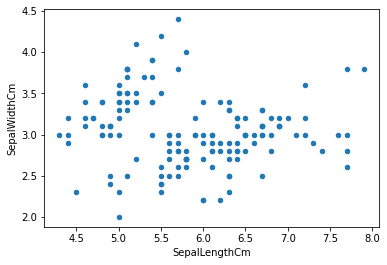

In [7]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

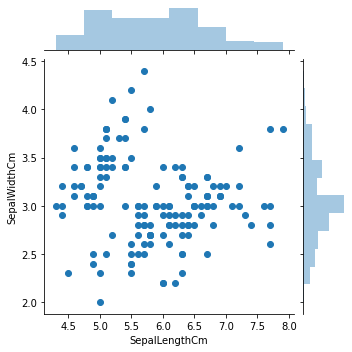

In [8]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

Use seaborn's FacetGrid to color the scatterplot by species

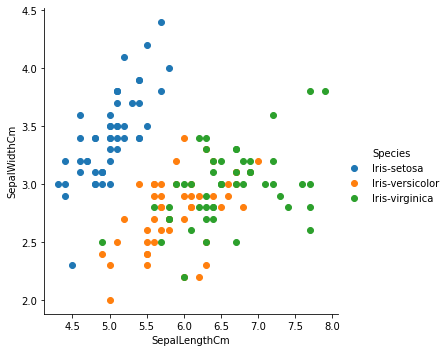

In [9]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

Look at an individual feature in Seaborn through a boxplot

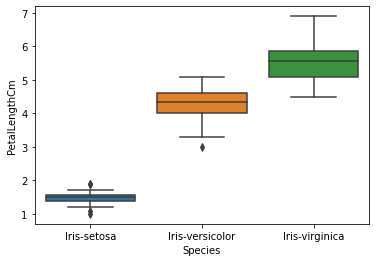

In [10]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

One way we can extend this plot is adding a layer of individual points on top of it through Seaborn's striplot
We'll use jitter=True so that all the points don't fall in single vertical lines above the species
Saving the resulting axes as ax each time causes the resulting plot to be shown on top of the previous axes

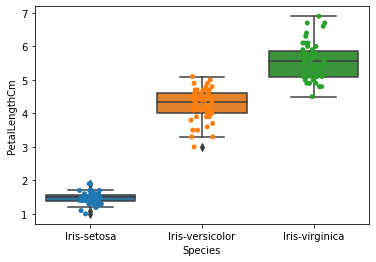

In [11]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

A violin plot combines the benefits of the previous two plots and simplifies them 
Denser regions of the data are fatter, and sparser thiner in a violin plot

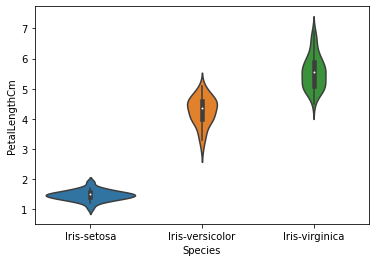

In [12]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

A final seaborn plot useful for looking at univariate relations is the kdeplot, which creates and visualizes a kernel density estimate of the underlying feature


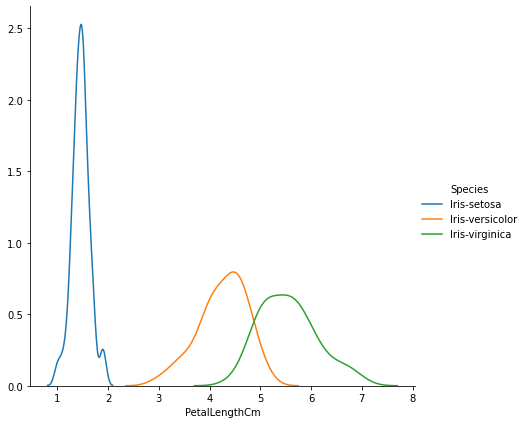

In [13]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations

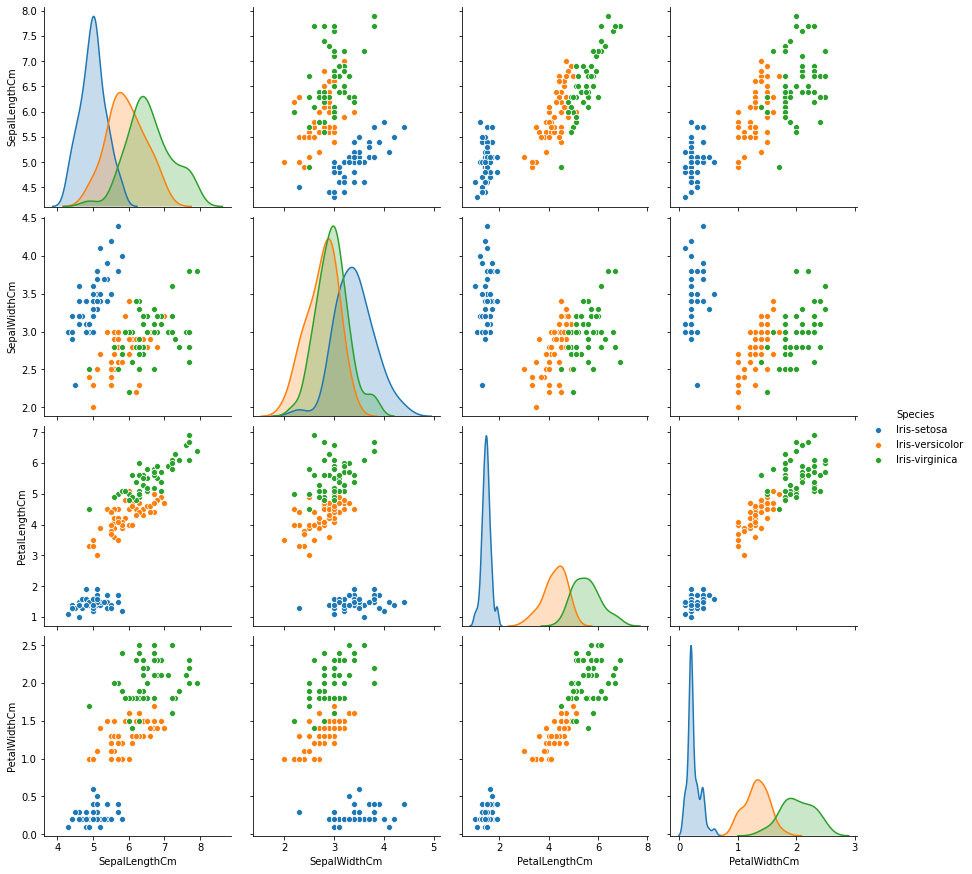

In [14]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)

There are 3 labels: `Iris-setosa`, `Iris-versicolor` and `Iris-virginica`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8346a4e400>,
      dtype=object)

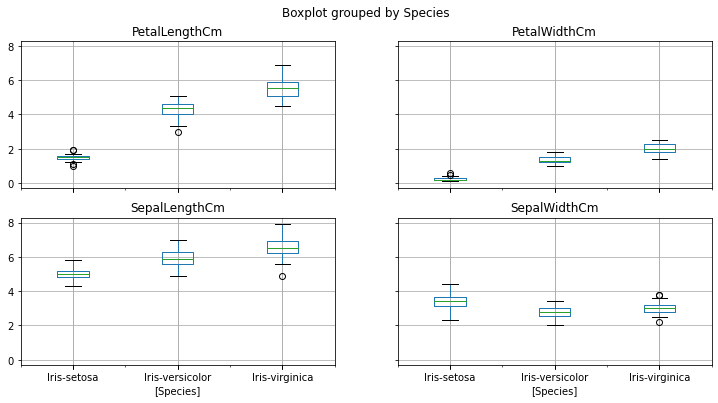

In [15]:
# Box plot grid
df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these

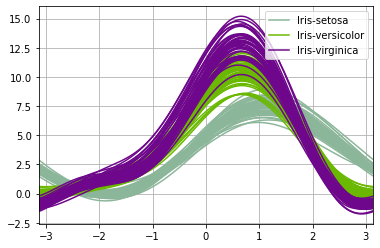

In [16]:
from pandas.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")

Another multivariate visualization technique pandas has is parallel_coordinates
Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample

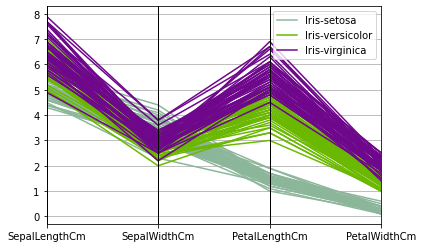

In [17]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop("Id", axis=1), "Species")

Which puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature

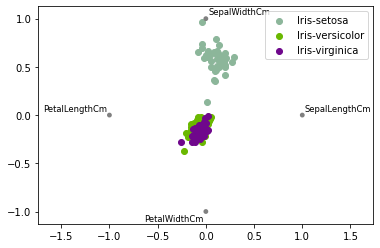

In [18]:
from pandas.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")

##Distribution on `Iris-setosa`/`Iris-versicolor`/`Iris-virginica`

In [0]:
count_Class=pd.value_counts(df["Species"], sort= True)

In [20]:
count_Class

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [21]:
type(count_Class)

pandas.core.series.Series

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


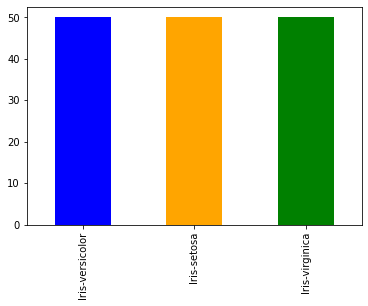

In [22]:
count_Class=pd.value_counts(df["Species"], sort= True)
print(count_Class)
count_Class.plot(kind= 'bar', color= ["blue", "orange", "green"])
# plt.title('Bar chart')
plt.show()

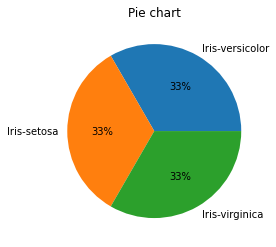

In [23]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

###Use GaussianNB for Classification

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [0]:
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0
